In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [8]:
# A bunch of utility functions

def show_array_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')
    
def imgshow(array_image):
    """ Show one array image as uint8 and remove axis labels """
    sqrtimg = int(np.ceil(np.sqrt(array_image.shape[0])))
    imshow_noax(array_image.reshape([sqrtimg,sqrtimg]), normalize=True)

def array_to_image(array):
    sqrtimg = int(np.ceil(np.sqrt(array.shape[0])))
    x = np.array(array.reshape([sqrtimg,sqrtimg]))
    return x
    
def image_to_array(image):
    l = image.shape[0]*image.shape[1]
    x = np.array(image.reshape([l]))
    return x

def center_square(array_image, square_h, square_w, pixel_value = 0.45):
    img = array_to_image(array_image)
    h, w = img.shape                     
    j = int(round((h - square_h)/2.))
    i = int(round((w - square_w)/2.))
    img[j:j+square_h, i:i+square_w] = pixel_value
    img = image_to_array(img)
    return img

def mask_images(array_images, masktype, *args):
    """ Retruns an array of image and masked image pairs """
    masked_images = []
    for array_image in array_images:
        if masktype == 'square':
            masked = center_square(array_image,*args)
        masked_images.append(array_image)
        masked_images.append(masked)
    return np.array(masked_images)

#utility functions for GANs

def preprocess_img(x):
    return 2 * x - 1.0

def deprocess_img(x):
    return (x + 1.0) / 2.0

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../data/MNIST', one_hot=False)

Extracting ../data/MNIST/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/t10k-labels-idx1-ubyte.gz


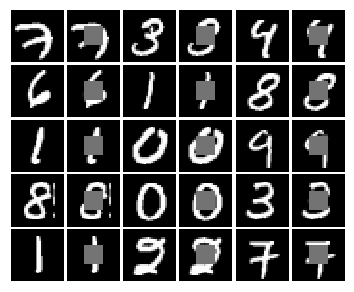

In [10]:
#Generating anomalies in images
images = mask_images(mnist.train.images[0:15],'square',10,10)
show_array_images(images)

In [5]:
#tf.reset_default_graph()

# number of images for each batch
batch_size = 128
# our noise dimension
noise_dim = 96

# placeholder for images from the training dataset
x = tf.placeholder(tf.float32, [None, 784])
# random noise fed into our generator
z_k = tf.Variable(sample_noise(batch_size, noise_dim))

with tf.variable_scope("") as scope:
    scope.reuse_variables()
    # generated images
    G_sample = generator(z_k)

with tf.variable_scope("") as scope:
    scope.reuse_variables()
    #scale images to be -1 to 1
    logits_real = discriminator(preprocess_img(x))
    # Re-use discriminator weights on new inputs
    scope.reuse_variables()
    logits_fake = discriminator(G_sample)

# Get the list of variables for the discriminator and generator
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator') 

# get our solver
z_solver = tf.train.AdamOptimizer(learning_rate=1e-3, beta1=0.5)

# get our loss
D_loss, G_loss = lsgan_loss(logits_real, logits_fake)
L2_loss = tf.nn.l2_loss(x-G_sample)
z_loss = L2_loss
z_grads = tf.gradients(z_loss, z_k)

#Train steps
z_train_step = z_solver.minimize(z_loss, var_list=z_k)

NameError: name 'sample_noise' is not defined

In [6]:
# random noise fed into our generator
z_k = tf.Variable(sample_noise(batch_size, noise_dim))

with tf.variable_scope("") as scope:
    scope.reuse_variables()
    # generated images
    G_sample = generator(z_k)
    
# get our solver
z_solver = tf.train.AdamOptimizer(learning_rate=1e-3, beta1=0.5)

# get our loss
L2_loss = tf.nn.l2_loss(x-G_sample)
z_loss = L2_loss
z_grads = tf.gradients(z_loss, z_k)

#Train steps
z_train_step = z_solver.minimize(z_loss, var_list=z_k)

NameError: name 'sample_noise' is not defined

In [25]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
#sess.run(tf.global_variables_initializer())

In [34]:
samples = sess.run(G_sample)
print(samples.shape)
show_array_images(samples[0:3])

RuntimeError: Attempted to use a closed Session.

In [ ]:
for _ in range(100):
  x = images[1]
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [64]:
#Backprop to input
momentum = 0.9
lr = 0.1

with get_session() as sess:
    print(z)
    sess.run(tf.global_variables_initializer())
    v = 0
    for i in range(1000):
        out_vars = [z_loss, z_grads, G_sample]
        in_dict = {x: np.reshape(images[1],[-1,784])}

        loss, grad, imout = sess.run(out_vars,  feed_dict=in_dict)

        v_prev = np.copy(v)
        v = momentum*v - lr*grad[0]
        z += (-momentum * v_prev +
                   (1 + momentum) * v)
        #z = np.clip(z, -1, 1)

Tensor("add_100:0", shape=(128, 96), dtype=float32)


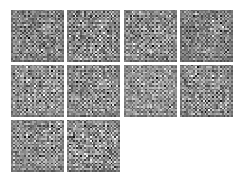

In [65]:
show_array_images(imout[0:10])

In [46]:
with get_session() as sess:
    sess.run(tf.global_variables_initializer())
    grads = tf.gradients(z_loss, z)
    print(grads)

[None]


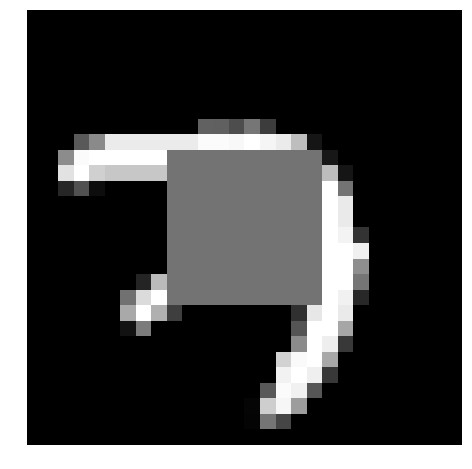

In [9]:
imgshow(images[1])

In [13]:
sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('../models/mnist_dcgan.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('../models/'))

INFO:tensorflow:Restoring parameters from ../models/mnist_dcgan.ckpt


In [23]:
graph = tf.get_default_graph()
op = graph.get_operation_by_name("discriminator_1/Reshape")
print(op)

name: "discriminator_1/Reshape"
op: "Reshape"
input: "generator/Reshape_1"
input: "discriminator_1/Reshape/shape"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "Tshape"
  value {
    type: DT_INT32
  }
}



In [26]:
def sample_noise(batch_size, dim):
    """Generate random uniform noise from -1 to 1.
    
    Iºnputs:
    - batch_size: integer giving the batch size of noise to generate
    - dim: integer giving the dimension of the the noise to generate
    
    Returns:
    TensorFlow Tensor containing uniform noise in [-1, 1] with shape [batch_size, dim]
    """
    noise = tf.random_uniform([batch_size, dim], minval=-1, maxval=1)
    return noise

In [28]:
#Sample from generator
graph = tf.get_default_graph()
gi = graph.get_tensor_by_name("random_uniform/shape:0")
go = graph.get_tensor_by_name("generator/Reshape_1:0")
z = sample_noise(batch_size, noise_dim)
sample_out = sess.run(op, feed_dict={gi: z})



TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles.

In [ ]:

    
# Now, let's access and create placeholders variables and
# create feed-dict to feed new data
 
graph = tf.get_default_graph()
z = graph.get_tensor_by_name("z:0")
feed_dict ={z:z}
 
#Now, access the op that you want to run. 
op_to_restore = graph.get_tensor_by_name("op_to_restore:0")



print sess.run(op_to_restore,feed_dict)
#This will print 60 which is calculated 
#using new values of w1 and w2 and saved value of b1.